In [18]:
import os
import numpy as np
import shutil
import random
import pandas as pd
from PIL import Image
import numpy as np
import pandas as pd 
from tensorflow.keras.utils import load_img
#from keras.preprocessing.image import ImageDataGenerator, load_img
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from keras.preprocessing import image
import keras.utils as image
import tensorflow.compat.v2 as tf

In [19]:
import tensorflow

In [20]:
import os
import numpy as np
import shutil
import random
from PIL import Image
#importing libraries to sample the images
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [21]:
root_dir = r"C:\Users\HP\Downloads\autism"
autistic_dir = r"C:\Users\HP\Downloads\autism\train\autistic"
nonautistic_dir = r"C:\Users\HP\Downloads\autism\train\non_autistic"
test_dir=r"C:\Users\HP\Downloads\autism\test"
autistic_dir_names = os.listdir(autistic_dir)
nonautistic_dir_names = os.listdir(nonautistic_dir)
train_dir=r"C:\Users\HP\Downloads\autism\train"
val_dir=r"C:\Users\HP\Downloads\autism\valid"

In [22]:
r=Image.open(r"C:\Users\HP\Downloads\autism\train\autistic\0051.jpg")

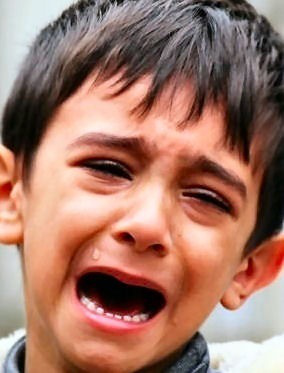

In [23]:
r

In [24]:
print(r.width)

284


In [25]:
print(r.height)

373


In [26]:
width = r.width
height = r.height
print(width)
print(height)

284
373


In [27]:

#Importing the tensorflow and keras libraries 
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras import Model
from tensorflow.keras.applications.vgg19 import VGG19

In [28]:
# Using the pretrained InceptionV3 Model
pre_trained_model = VGG19(input_shape=(224,224,3),
                                include_top=False,
                                weights ='imagenet')

80134624/80134624 [==============================] - 9s 0us/step


In [29]:
# Not training the upper layers
for layer in pre_trained_model.layers:
  layer.trainable=False


In [30]:
pre_trained_model.summary()

Model: "vgg19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [31]:
from tensorflow.keras.optimizers import Adam
X = layers.Flatten()(pre_trained_model.output)
X = layers.Dense(1024,activation='relu')(X)
X = layers.Dropout(0.2)(X)
X = layers.Dense(1,activation='sigmoid')(X)
model = Model(pre_trained_model.input,X)
model.compile(optimizer = Adam(lr=0.001),
              loss = 'binary_crossentropy',
              metrics=['acc'])

In [32]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
## Add our data-augmentation parameters to ImageDataGenerator
train_datagen = ImageDataGenerator(rescale = 1./255.,
                                   rotation_range = 40,
                                   width_shift_range = 0.2,
                                   height_shift_range = 0.2,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

# Note that the validation data should not be augmented!
test_datagen = ImageDataGenerator( rescale = 1.0/255. )

In [33]:
# Flow training images in batches of 20 using train_datagen generator
train_generator = train_datagen.flow_from_directory(train_dir,
                                                    batch_size = 20,
                                                    class_mode = 'binary', 
                                                    target_size = (224, 224))     

# Flow validation images in batches of 20 using test_datagen generator
validation_generator =  test_datagen.flow_from_directory( val_dir,
                                                          batch_size  = 20,
                                                          class_mode  = 'binary', 
                                                          target_size = (224, 224))

Found 2526 images belonging to 2 classes.
Found 200 images belonging to 2 classes.


In [34]:
t_img,label=train_generator.next()

In [35]:
print(r.width)

284


In [36]:
t_img

array([[[[7.30077699e-02, 2.11563446e-02, 0.00000000e+00],
         [1.60696223e-01, 7.72769526e-02, 0.00000000e+00],
         [2.67526418e-01, 1.42968431e-01, 4.78543304e-02],
         ...,
         [9.89249647e-01, 9.29411829e-01, 8.73495519e-01],
         [9.92807388e-01, 9.30062234e-01, 8.71238708e-01],
         [9.94911373e-01, 9.32166278e-01, 8.73342752e-01]],

        [[6.46320209e-02, 2.15932485e-02, 0.00000000e+00],
         [1.08641565e-01, 4.39619720e-02, 0.00000000e+00],
         [2.02978626e-01, 1.03406891e-01, 1.66215356e-02],
         ...,
         [9.94188368e-01, 9.31443274e-01, 8.72619748e-01],
         [9.96078491e-01, 9.33333397e-01, 8.74509871e-01],
         [9.96078491e-01, 9.33333397e-01, 8.74509871e-01]],

        [[6.13059141e-02, 2.46975925e-02, 5.84089605e-04],
         [6.89080805e-02, 2.01678984e-02, 0.00000000e+00],
         [1.44275352e-01, 6.67676032e-02, 0.00000000e+00],
         ...,
         [9.96078491e-01, 9.33333397e-01, 8.74509871e-01],
         [

In [37]:
history = model.fit(
            train_generator,
            validation_data = validation_generator,
            epochs = 50,
            validation_steps=4,
            verbose=1)

Epoch 1/50
127/127 [==============================] - 474s 4s/step - loss: 1.4616 - acc: 0.6429 - val_loss: 0.6213 - val_acc: 0.6625
Epoch 2/50
127/127 [==============================] - 517s 4s/step - loss: 0.5894 - acc: 0.6983 - val_loss: 0.5416 - val_acc: 0.7250
Epoch 3/50
127/127 [==============================] - 584s 5s/step - loss: 0.5296 - acc: 0.7320 - val_loss: 0.4607 - val_acc: 0.7875
Epoch 4/50
127/127 [==============================] - 1991s 16s/step - loss: 0.5541 - acc: 0.7126 - val_loss: 0.6247 - val_acc: 0.6625
Epoch 5/50
127/127 [==============================] - 469s 4s/step - loss: 0.5344 - acc: 0.7272 - val_loss: 0.5534 - val_acc: 0.6875
Epoch 6/50
127/127 [==============================] - 837s 7s/step - loss: 0.5167 - acc: 0.7363 - val_loss: 0.5837 - val_acc: 0.6875
Epoch 7/50
127/127 [==============================] - 508s 4s/step - loss: 0.5297 - acc: 0.7356 - val_loss: 0.5120 - val_acc: 0.7750
Epoch 8/50
127/127 [==============================] - 560s 4s/step 

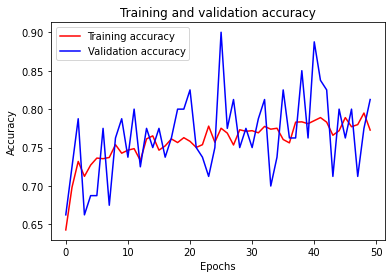

<Figure size 432x288 with 0 Axes>

In [64]:
# Ploting the accuracy Curve
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy'
        )
plt.title('Training and validation accuracy')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend(loc=0)
plt.figure()


plt.show()  

In [1]:
# Ploting the accuracy Curve
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss'
        )
plt.title('Training and validation Loss')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend(loc=0)
plt.figure()


plt.show()  

NameError: name 'history' is not defined

In [48]:
test_generator = test_datagen.flow_from_directory(
    directory=test_dir,
    target_size=(224, 224),
    #color_mode="rgb",
    batch_size=1,
    class_mode='binary'
    #shuffle=False,
    #seed=42
)

Found 200 images belonging to 2 classes.


In [49]:
STEP_SIZE_TEST=test_generator.n//test_generator.batch_size
test_generator.reset()
pred=model.predict_generator(test_generator,
steps=STEP_SIZE_TEST,
verbose=1)

C:\Users\HP\AppData\Local\Temp/ipykernel_21448/2987361598.py:3: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  pred=model.predict_generator(test_generator,


200/200 [==============================] - 31s 152ms/step


In [50]:
pred[0]

array([0.43927717], dtype=float32)

In [51]:
pred[1]

array([0.8984405], dtype=float32)

In [52]:
predicted_class_indices = [ ]
for i in pred:
	if i > 0.5:
		predicted_class_indices.append(1)
	else:
		predicted_class_indices.append(0)
print(predicted_class_indices)
predicted_class_indices= np.array(predicted_class_indices)
labels = (train_generator.class_indices)
labels = dict((v,k) for k,v in labels.items())
predictions = [labels[k] for k in predicted_class_indices]
filenames=test_generator.filenames
results=pd.DataFrame({"Filename":filenames,
                      "Predictions":predictions})


[0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1]


In [53]:
labels

{0: 'autistic', 1: 'non_autistic'}

In [54]:
results

,Filename,Predictions
0,autistic\001.jpg,autistic
1,autistic\002.jpg,non_autistic
2,autistic\003.jpg,autistic
3,autistic\004.jpg,non_autistic
4,autistic\005.jpg,autistic
...,...,...
195,non_autistic\096.jpg,autistic
196,non_autistic\097.jpg,non_autistic
197,non_autistic\098.jpg,autistic
198,non_autistic\099.jpg,non_autistic


In [55]:
for i in range(1,test_list+1):
    test_non_autistic="/autism/test/non_autistic/"+str(i).zfill(3)+'.jpg'
    test_autistic="/autism/test/autistic/"+str(i).zfill(2)+'.jpg'
    print(test_non_autistic)

NameError: name 'test_list' is not defined

In [56]:
test_list = 200

l=[]
counter = 0
for i in range(1,test_list+1):
    #test_non_autistic="autism/test/non_autistic/"+str(i).zfill(3)+'.jpg'
    test_autistic="autism/test/autistic/"+str(i).zfill(3)+'.jpg'
    if counter<100:
        l.append(0)
    else:
        l.append(1)
    counter+=1
print(l)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]


In [57]:
len(l)

200

In [58]:
from sklearn.metrics import classification_report,accuracy_score, f1_score,confusion_matrix
cm = confusion_matrix(l,predicted_class_indices)
print('Confusion Matrix: ',cm)

Confusion Matrix:  [[44 56]
 [47 53]]


<AxesSubplot:title={'center':'VGG19'}>

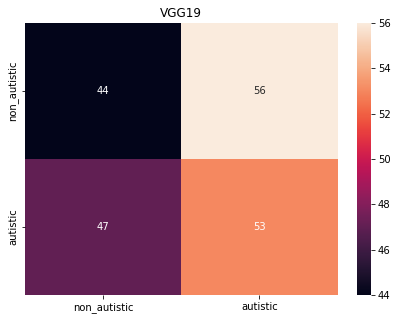

In [66]:
dp_cm = pd.DataFrame(cm, index = [i for i in ["non_autistic","autistic"]],columns = [i for i in ["non_autistic","autistic"]])
plt.figure(figsize = (7,5))
plt.title("VGG19")
sns.heatmap(dp_cm, annot=True ,fmt='g')

In [60]:
import seaborn as sns

In [62]:
    print(classification_report(l, predicted_class_indices))

              precision    recall  f1-score   support

           0       0.48      0.44      0.46       100
           1       0.49      0.53      0.51       100

    accuracy                           0.48       200
   macro avg       0.48      0.48      0.48       200
weighted avg       0.48      0.48      0.48       200

